In [1]:
import qiskit
from qiskit import IBMQ

In [2]:
provider = IBMQ.load_account()

In [3]:
provider_2 = IBMQ.get_provider(hub='ibm-q-melbourne', group='uom-researchers')

In [4]:
print("Available backends:")
provider.backends()

Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer

In [5]:
provider_2.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-melbourne', group='uom-researchers', project='default')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q-melbourne', group='uom-researchers', project='default')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-melbourne', group='uom-researchers', project='default')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-melbourne', group='uom-researchers', project='default')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-melbourne', group='uom-researchers', project='default')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-melbourne', group='uom-researchers', project='default')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-melbourne', group='uom-researchers', project='default')>,
 <IBMQBackend('ibmq_manhattan') from IBMQ(hub='ibm-q-melbourne', group='uom-researchers', project='default')>,
 <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-melbourne', group='uom-researchers', project='default')>,
 <IBMQBacke

In [6]:
backend = provider_2.get_backend('ibmq_mumbai')

In [73]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile
from qiskit import Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_circuit_layout
from qiskit.visualization import plot_gate_map

In [8]:
no_shots = 8192

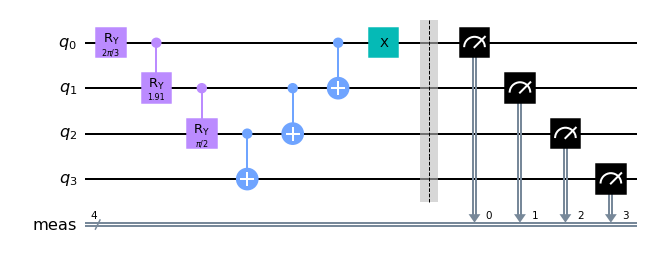

In [9]:
R=4
w_one = QuantumCircuit(R)
for r in range(0,R-1):
    if r == 0:
        w_one.ry(2*np.arccos(1/np.sqrt(R-r)),r)
    elif r != R-1:
        w_one.cry(2*np.arccos(1/np.sqrt(R-r)), r-1, r)
for r in range(1,R):
    w_one.cx(R-r-1,R-r)
w_one.x(0)
w_one.measure_all()
w_one.draw('mpl')

In [10]:
simulator = provider_2.get_backend('simulator_statevector')

In [11]:
basis_gates = backend.configuration().basis_gates
coupling_map = backend.configuration().coupling_map

In [12]:
simulation = execute(w_one, simulator, shots = no_shots)

In [13]:
sim_results = simulation.result()

In [14]:
sim_counts = sim_results.get_counts()

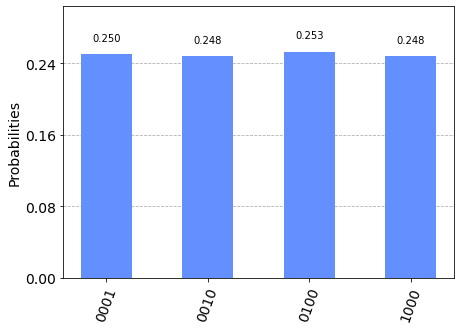

In [15]:
fig = plot_histogram(sim_counts)
fig.patch.set_facecolor([1,1,1,1])
fig

In [16]:
new_w = transpile(w_one, coupling_map = coupling_map, basis_gates = basis_gates)

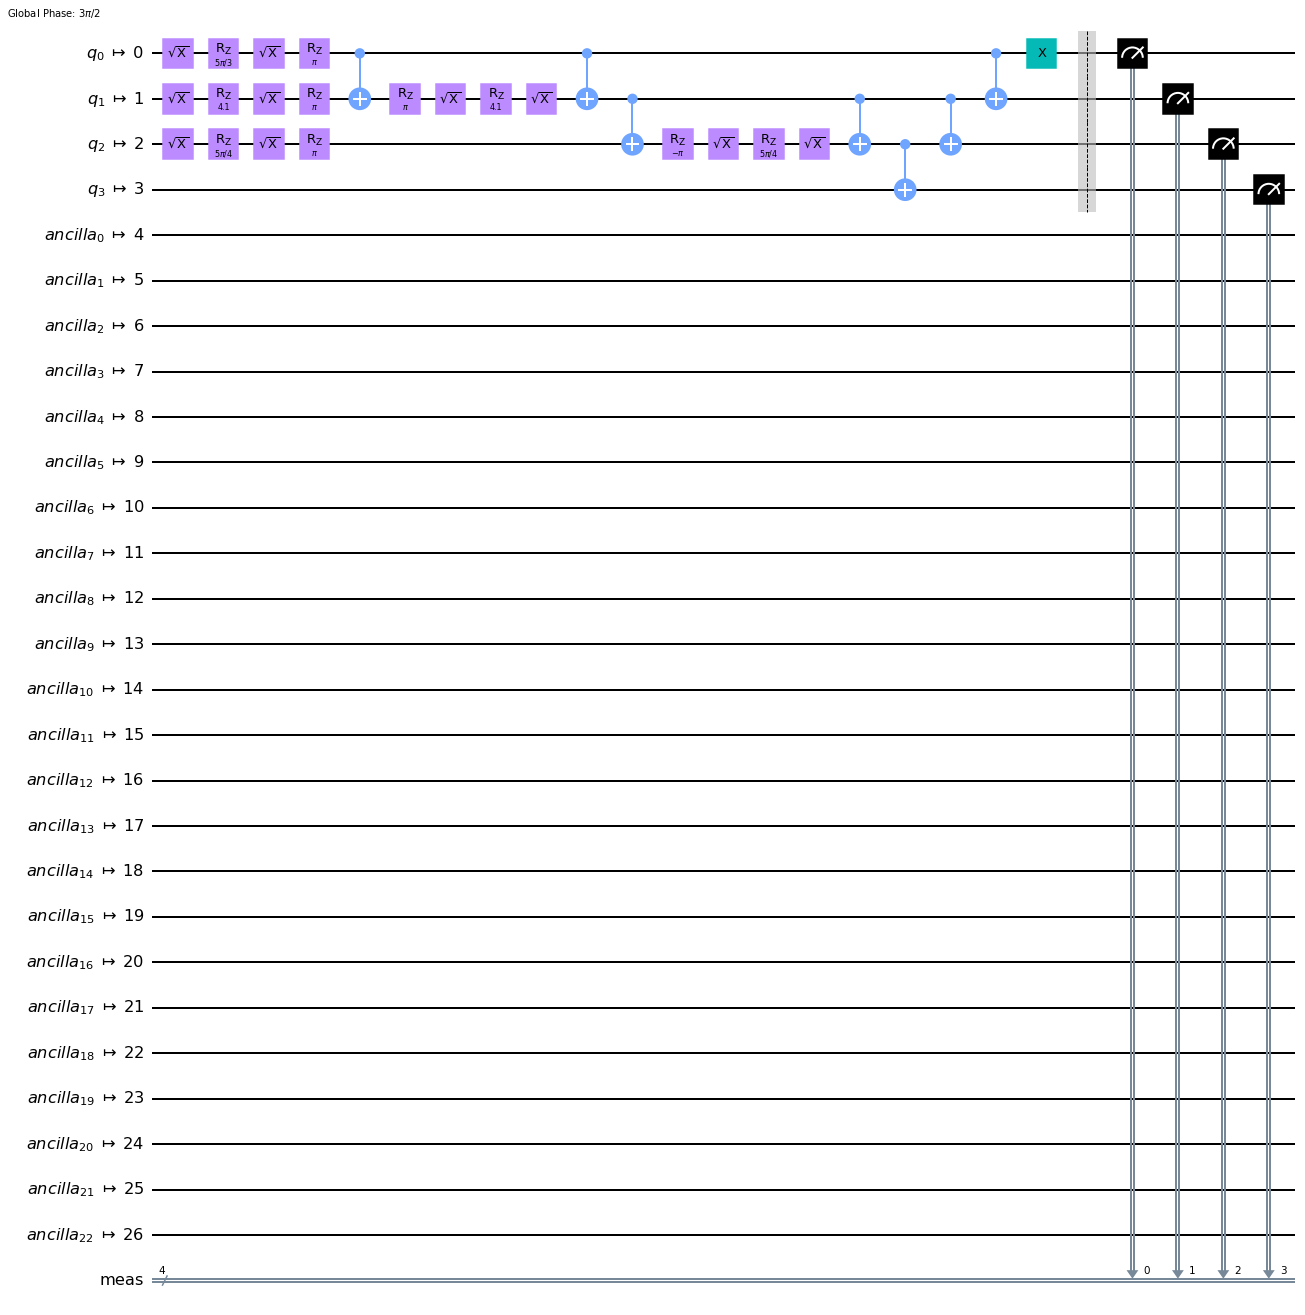

In [17]:
new_w.draw('mpl')

In [18]:
simulation_2 = execute(w_one, simulator, shots = no_shots)
counts_2 = simulation_2.result().get_counts()

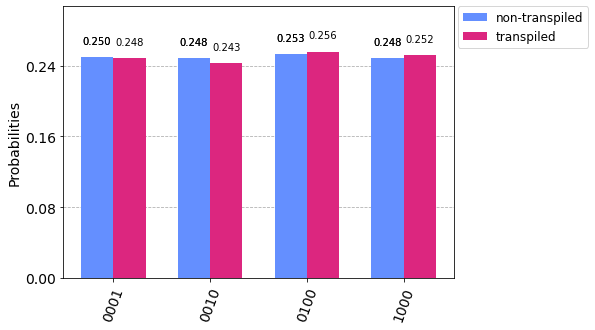

In [24]:
fig = plot_histogram([sim_counts, counts_2], legend=['non-transpiled', 'transpiled'])
fig.patch.set_facecolor([1,1,1,1])
fig

In [25]:
real_results = execute(new_w, backend, shots = no_shots)

In [28]:
result = real_results.result()

In [30]:
real_counts = result.get_counts()

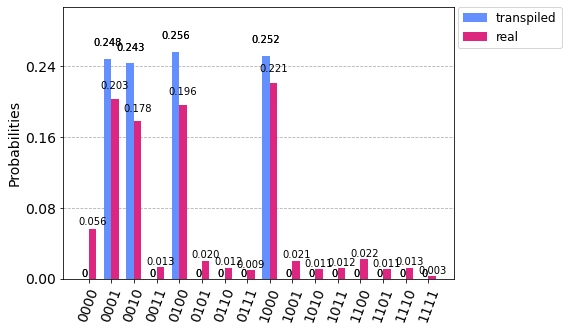

In [32]:
fig = plot_histogram([counts_2, real_counts], legend=['transpiled', 'real'])
fig.patch.set_facecolor([1,1,1,1])
fig

In [33]:
result

Result(backend_name='ibmq_mumbai', backend_version='1.4.38', qobj_id='274e793d-3596-419b-9cc5-50924afa4fe4', job_id='610ba46e0b6410fc78ef0cfb', success=True, results=[ExperimentResult(shots=8192, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 456, '0x1': 1662, '0x2': 1458, '0x3': 109, '0x4': 1606, '0x5': 166, '0x6': 102, '0x7': 76, '0x8': 1811, '0x9': 168, '0xa': 90, '0xb': 95, '0xc': 179, '0xd': 88, '0xe': 103, '0xf': 23}), header=QobjExperimentHeader(clbit_labels=[['meas', 0], ['meas', 1], ['meas', 2], ['meas', 3]], creg_sizes=[['meas', 4]], global_phase=4.71238898038469, memory_slots=4, metadata={}, n_qubits=27, name='circuit-0', qreg_sizes=[['q', 27]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26]]), memory=Fal

In [55]:
new_w = transpile(w_one, backend, optimization_level = 3)

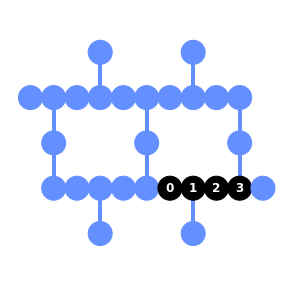

In [61]:
plot_circuit_layout(new_w, backend)

In [128]:
initial_layout = new_w._layout
print(initial_layout)
layout = list(initial_layout.get_virtual_bits().items())
new_layout = {}
print(layout)
for item in layout:
    print(item[0].register.name)
    if item[0].register.name == 'q':
        new_layout[item[0]] = item[1]
print(new_layout)

Layout({
19: Qubit(QuantumRegister(4, 'q'), 1),
22: Qubit(QuantumRegister(4, 'q'), 2),
25: Qubit(QuantumRegister(4, 'q'), 3),
16: Qubit(QuantumRegister(4, 'q'), 0),
0: Qubit(QuantumRegister(23, 'ancilla'), 0),
1: Qubit(QuantumRegister(23, 'ancilla'), 1),
2: Qubit(QuantumRegister(23, 'ancilla'), 2),
3: Qubit(QuantumRegister(23, 'ancilla'), 3),
4: Qubit(QuantumRegister(23, 'ancilla'), 4),
5: Qubit(QuantumRegister(23, 'ancilla'), 5),
6: Qubit(QuantumRegister(23, 'ancilla'), 6),
7: Qubit(QuantumRegister(23, 'ancilla'), 7),
8: Qubit(QuantumRegister(23, 'ancilla'), 8),
9: Qubit(QuantumRegister(23, 'ancilla'), 9),
10: Qubit(QuantumRegister(23, 'ancilla'), 10),
11: Qubit(QuantumRegister(23, 'ancilla'), 11),
12: Qubit(QuantumRegister(23, 'ancilla'), 12),
13: Qubit(QuantumRegister(23, 'ancilla'), 13),
14: Qubit(QuantumRegister(23, 'ancilla'), 14),
15: Qubit(QuantumRegister(23, 'ancilla'), 15),
17: Qubit(QuantumRegister(23, 'ancilla'), 16),
18: Qubit(QuantumRegister(23, 'ancilla'), 17),
20: Qubit

<ipython-input-128-ba01b279c6a1>:7: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  print(item[0].register.name)
<ipython-input-128-ba01b279c6a1>:8: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if item[0].register.name == 'q':


In [129]:
new_layout_list = list(new_layout.values())

{Qubit(QuantumRegister(4, 'q'), 1): 19,
 Qubit(QuantumRegister(4, 'q'), 2): 22,
 Qubit(QuantumRegister(4, 'q'), 3): 25,
 Qubit(QuantumRegister(4, 'q'), 0): 16}

In [138]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
qr = QuantumRegister(4, 'q')
meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

In [186]:
from qiskit import assemble
t_qc = transpile(meas_calibs, backend)
qobj = assemble(t_qc, shots=8192, qobj='1')
cal_results = execute(t_qc, backend = backend, shots=8192, initial_layout = new_layout_list).result()

In [187]:
from qiskit.visualization import array_to_latex
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
array_to_latex(meas_fitter.cal_matrix)

<IPython.core.display.Latex object>

In [188]:
# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(result)
mitigated_counts = mitigated_results.get_counts()

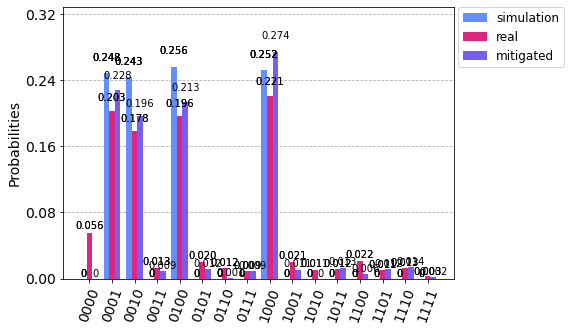

In [190]:
fig = plot_histogram([counts_2, real_counts, mitigated_counts], legend=['simulation', 'real', 'mitigated'])
fig.patch.set_facecolor([1,1,1,1])
fig

In [201]:
w_one.append(w_one.inverse(), range(w_one.num_qubits))

In [203]:
simulation_inv = execute(w_one, simulator, shots=8192).result()
sim_counts_inv = simulation_inv.get_counts()

QiskitError: 'No counts for experiment "0"'

In [ ]:
plot_histogram(sim_counts_inv)